In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file containing data
data = pd.read_csv("C:\\Users\\heyle\\Documents\\Kaggle_Datasets\\titanic_train_data.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Check for null/Nan values

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

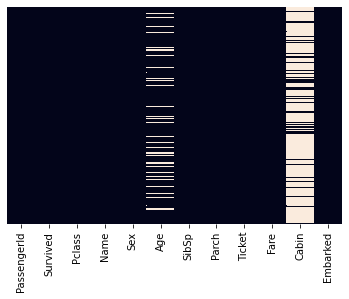

In [5]:
# use a heatmap to visualize columns with missing values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

Text(0.5, 1.0, 'Bar graph of passengers who survived and passengers who did not')

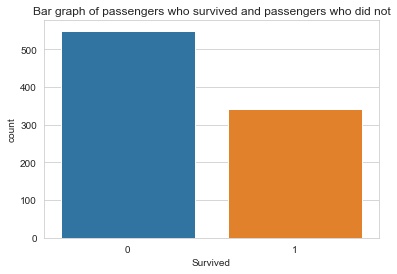

In [6]:
# check the survival count for the passengers
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = data)
plt.title("Bar graph of passengers who survived and passengers who did not")

Text(0.5, 1.0, 'Bar graph of survival rate between male and female passengers')

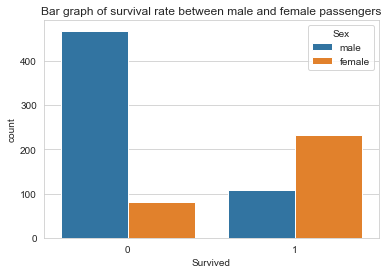

In [7]:
# check the survival rate between male and female passengers
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Sex", data = data)
plt.title("Bar graph of survival rate between male and female passengers")

Text(0.5, 1.0, 'Bar graph of passengers to survive between different classes.')

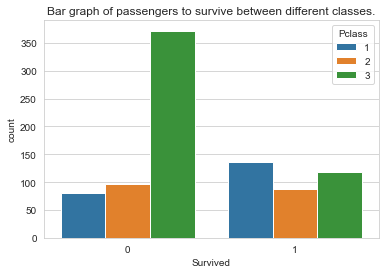

In [8]:
# check the survival rate between passengers in different classes
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = data)
plt.title("Bar graph of passengers to survive between different classes.")

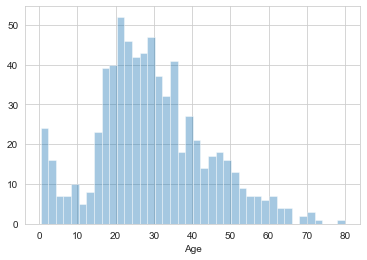

In [9]:
# display the age distribution of passenegers
sns.distplot(data.Age.dropna(), kde=False, bins=40)

Most passengers are between the ages of 18 and 40 years.

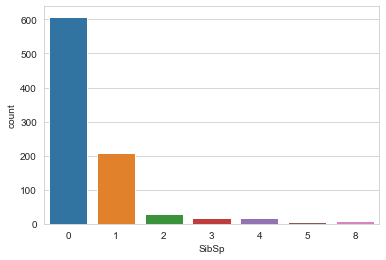

In [10]:
# show the ammount of siblings or spouses for each passenger
sns.countplot(x = "SibSp", data = data)

## Data Cleaning
In this section the dataset will be reviewed and cleaned appropriately.

#### Handling the Nan values
When dealing with the missing values they can simply be drpped or imputed with the mean age value. But when breaking the relations between features down it can be seen that the Age column holds a relationship with the Pclass column. by making use of the age groups within these classes the Nan values within the Age column can be imputed with greater accuracy.

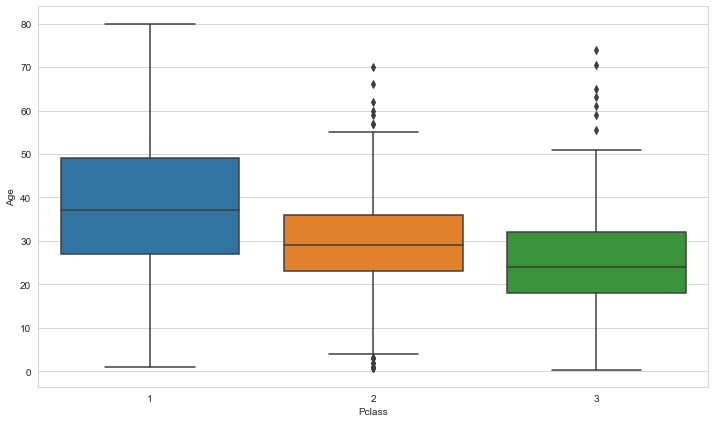

In [11]:
# draw a boxplot representing the ages within each class
plt.figure(figsize=(12,7))
sns.boxplot(x = "Pclass", y = "Age", data = data)

The above boxplot shows the age ranges of each class. This provides usefull information that can be used to further increase the accuracy of the imputation process for the NaN values within the Age column.

##### Create a function that will impute the Nan values for the age column according to the respective class wich the Nan values falls within

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

#### Apply the above function to the dataset

In [13]:
data.Age = data[["Age", "Pclass"]].apply(impute_age, axis=1)

Check the heatmap of Nan values to ensure imputation is successful

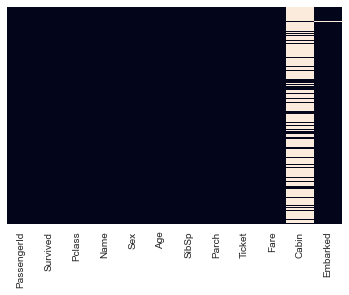

In [14]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In the above heatmap it can be seen that the Nan values within the Age column have been successfully imputed with the help of the user defiend function that was applied to the dataset.

When looking at the above heatmap of NaN values in the dataset it can be seen that a large ammount of the Cabin column values are NaN values. In this case the Cabin column will be dropped from the dataset because of this.

In [15]:
# drop the cabin column
data.drop("Cabin", axis=1, inplace=True)

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Check for any remaining null values within the data

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Isolate the remaining NaN values

In [18]:
data[data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Drop the NaN values shown in the above frame

In [19]:
data.dropna(inplace=True)

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Handling categorical data
Here we will be converting the columns with string values of categorical data into binary data

In [22]:
data["Gender"] = data.Sex.map({"male":1, "female":0})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


Get dummy variables for the Embarked column

In [23]:
embarked = pd.get_dummies(data.Embarked, drop_first=True)

In [24]:
data = pd.concat([data, embarked], axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


Now the features that are of no value to us may be dropped from the dataframe

In [25]:
data.drop(["PassengerId", "Name", "Sex", "Ticket", "Embarked"], inplace=True, axis=1)

In [26]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


## Data Visualisation
In this section we will be taking a closer look at relationships between features in the dataset as well as exploring some further insights within the data. 

Display a pie chart with the ratio of male and females on board

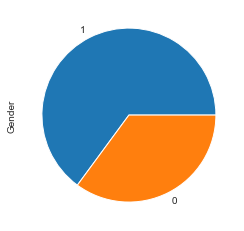

In [27]:
data.Gender.value_counts().plot(kind="pie")

Draw a scatterplot of the Fare payed and the Ages , seperate by using gender.

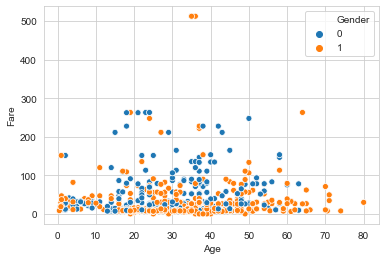

In [28]:
sns.scatterplot(x = data.Age, y = data.Fare, hue=data.Gender, data = data)

Create a histogram showing the Fares payed by passengers

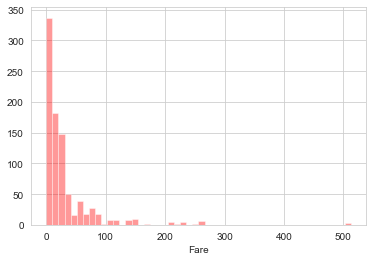

In [29]:
sns.distplot(data.Fare, kde=False, bins=50, color="red")

Display the number of passengers in each class using a distribution plot

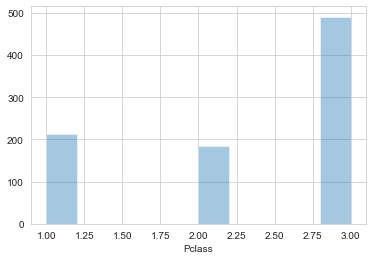

In [30]:
sns.distplot(data.Pclass, kde=False)

In [31]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


### Splitting the data into training and testing data
The above preprocessed data will be split into a features matrix and target vector for the model to be trained and tested on.

In [32]:
# create the target vector
target = data.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [33]:
# create the features matrix
data.drop("Survived", axis=1, inplace=True)
features = data
features

,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [44]:
# display the ammount of passengers to board at each port
qVals = features[features.Q == 1].Q.count()
sVals = features[features.S == 1].S.count()
allEmbrkd = features.Age.count()
cVals = allEmbrkd - (qVals + sVals)
print("Port C:", cVals)
print("Port Q:", qVals)
print("Port S:", sVals)

Port C: 168
Port Q: 77
Port S: 644


## Model Selection 
In the following section the best suited ML classifier will be selected for the case.

In [45]:
# import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [47]:
# a list of candidate algorithms
algScores = []
crossValScores = []
algList = [["Random_Forest_Classifier", RandomForestClassifier()],
           ["Extra_Trees_Classifier", ExtraTreesClassifier()],
           ["Gradient_Boosting_Classifier", GradientBoostingClassifier()],
           ["KNeighbours_Classifier", KNeighborsClassifier()],
           ["SVC", SVC()]
          ]
for clf in algList:
    modelName = clf[0]
    model = clf[1]
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    algScores.append(["Model",modelName, "Train score:", train_score, "Test score:", test_score])
    
    #cValScore = cross_val_score(model, features, target, scoring="accuracy")
    #crossValScores.append(modelName)
    #crossValScores.append(cValScore)
    
algScoreFrame = pd.DataFrame(data=algScores)
algScoreFrame

,0,1,2,3,4,5
0,Model,Random_Forest_Classifier,Train score:,0.984529,Test score:,0.837079
1,Model,Extra_Trees_Classifier,Train score:,0.984529,Test score:,0.814607
2,Model,Gradient_Boosting_Classifier,Train score:,0.904360,Test score:,0.848315
3,Model,KNeighbours_Classifier,Train score:,0.794655,Test score:,0.702247
4,Model,SVC,Train score:,0.680731,Test score:,0.668539


In [48]:
# implement best perfroming alg
model = GradientBoostingClassifier()

In [49]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [51]:
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [54]:
print(model.predict(x_test))
print(y_test)
print(model.score(x_test, y_test))

[0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0]
95     0
636    0
197    0
688    0
645    1
      ..
704    0
683    0
370    1
135    0
168    0
Name: Survived, Length: 178, dtype: int64
0.8258426966292135
